In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



### Adelina Branescu
### Solo Project

# Introduction

This project explored the similarities and differences between languages inside and neighboring the Balkan peninsula. I looked at the linguistic influence of the former Austro-Hungarian empire on three nearby countries: Romania, Bulgaria, and Albania. 

Curiously, the four languages analyzed in this project (as with many languages within that region of Europe) have no significant linguistic similarities. Hungarian is an Uralic language, a category that features Finnish and Estonian as well. Hungary is in between Central Europe, Eastern Europe, and the Balkan Peninsula. It formerly belonged to the Austro-Hungarian empire, and its language left and culture left some influence in the region. 

Romanian is a Balkan Romance language native to Romania and Moldova that is Latin based and thus evolved from Vulgar Latin. This puts it in the same category as Spanish, French, Italian, and Portugese, for example. I predict that Romanian will be more likely to contain words borrowed from Hungarian than the other languages in this project because part of Romania once belonged to Hungary.

Lastly, Albanian is an Indo-European language with no known language in its language group and contesting hypotheses regarding its origins. Evidently, none of these four languages belong to the same linguistic group and native speakers from each respective language cannot understand each other for the most part. However, to a foreigner outside the region, they tend to sound somewhat similar and clearly have more in common than languages from other regions of the world. Additionally, many words do share roots and are borrowed between each other. In this project, I will show examples of some before scratching the surface of similarities and differences between the languages.

### Ultimately, I answered these questions: 

1) Is Romanian more similar to Hungarian than Bulgarian and Albanian are?

The answer is no, it is not more similar. Although Romanian tends to have more borrowed words, it does not look like the language as a whole displays any larger similarities. This suggests that proximity to a country does not offer enough clues about similarity. Romanian shares the most characters with other Latin based languages found in Western Europe at a farther distance than the countries in the Balkan Peninsula.

2) What features are specific to each of these languages? 

The length of words, the number of vowels or consonants, and the ratio of vowels to consonants offered the most clues in distinguishing these languages from each other. 
    
### These are some questions that I ended up exploring in the project: 

- How can I model similarity between languages? Is looking at common characters enough of a starting point?
    - The answer turned out to be no, looking at characters in common is not enough. It helps find cognates and similar words, but it does not account for patterns that may be borrowed between lagnauges. 
- What do borrowed words have in conmmon?
    - The words in this dataset that had 4 or more letters in common with its Hungarian counterpart tended to be cognates. They tended to be lengthy words with a roughly 4:3 consonant to vowel ratio. They were often times farming related and found in all three languages.
- Can we predict what language a word is based on specific features?
    - Yes, it seems we can! There was moderate success in predicting what language a word belonged to based on key features. This also showed how different two languages from neighboring countries can be despite sounding similar when spoken. An explanation for this could be that pronunciation styles are shared within regions with little impact on the actual language itself.
- Does a language's similarity to Hungarian help us identify the language?
    - No, my already poor model of measuring similarity only increased the accuracy of my prediction model by a few percentage points.  

### Example

Here is how 'dust' is said in each language:

Romanian:      

3     praf     

4  pulbere      

Hungarian: 

4  por      


Albanian:     

8  'pluhur     


Bulgarian:   

4  prax     


# Data Description

- Where can your raw source data be found, if applicable?
    
    - [Hungarian Raw Data](https://ids.clld.org/contributions/179)
    - [Hungarian GitHub 70.4 KB](https://github.com/avb37/2950Final/blob/master/Hungarian.csv) 
    - [Albanian Raw Data](https://ids.clld.org/contributions/205)
    - [Albanian GitHub 110 KB](https://github.com/avb37/2950Final/blob/master/Albanian.csv)
    - [Bulgarian Raw Data](https://ids.clld.org/contributions/200)
    - [Bulgarian GitHub 95.2 KB](https://github.com/avb37/2950Final/blob/master/Bulgarian.csv)
    - [Romanian Raw Data](https://ids.clld.org/contributions/179)
    - [Romanian GitHub 51.1 KB](https://github.com/avb37/2950Final/blob/master/Romanian.csv)

- What are the observations (rows) and the attributes (columns)?
    - Name: word in respective language
    - Parameter: word in English
    - Language: Romanian, Albanian, Hungarian, or Bulgarian
   
- Why was this dataset created?
    - These datasets are created for public use, for research purposes, by The Intercontinental Dictionary Series, with Founding Editor: Mary Ritchie Key, General Editor: Bernard Comrie.

- What processes might have influenced what data was observed and recorded and what was not?
    - Not all existing words may have been recorded, which can sway data in a certain way depending on what words were selected.
    
- What preprocessing was done, and how did the data come to be in the form that you are using?
    - [merged_clean.csv](merged_clean.csv) Is the dataset I created that compiled 4 of these datasets into one. I removed any rows that contained NaN so that each word used contained a translation in each language. I did not want to exclude certain languages from the analysis of particular words because that would sway my results.
    


# Preregistration statement

*Disclaimer: I could not find data for the Turkish language, which I originally preregistered as the language whose influence I would trace. Instead, I used Hungarian.

### Copied from Phase III:

"I want to see if there is a relationship between the distance a country has from Turkey and the amount of words in common with the Turkish language."

"Lastly, I would like to look at a city as each entry, on the x axis is the percentage of words in common with the turkish language spoken in that city, on the y axis will be the distance from Istanbul, and then I will look to see if there is a positive correlation."

### Modified Analyses:

1) Use linear regression to predict if there are more than three words in common with Hungarian langauge. 
2) Use logistic regression (binary) to predict if a word belongs to one of two languages given how many characters it has in common with Hungarian, and other factors.

# Data Analysis

In [2]:
hung_comparison = pd.read_csv("hung_comparison.csv")
hung_comparison['Common Char %'] = hung_comparison['Common Char']/hung_comparison['Length']
h_a = pd.read_csv("h_a.csv")
h_b = pd.read_csv("h_b.csv")
h_r = pd.read_csv("h_r.csv")
result = pd.read_csv("result.csv")
result['Vowel Percent'] = result['Vowel Ct']/result['Word Len']
result['Cons Percent'] = result['Cons Ct']/result['Word Len']
result['Cons/Vowel'] = result['Cons Ct']/result['Vowel Ct']

## Graphs and Data Exploration

### Graphs

Below, I wanted to quickly visualize the relationships between words in different the languages I was analyzing. I looked at:
    
    - Length vs. Vowel Count, I found that Romanian had more vowels per word than Bulgarian did even when the same length word.
    
    - Length vs. Common Character, I found that Romanian was more likely than Bulgarian to have characters in common with Hungarian.
    
    - Relationship between Vowel Count and Consonant Count.
    
Among others I will describe below.

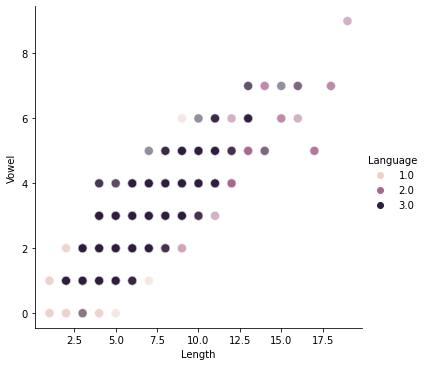

In [3]:
sns.relplot(x="Length", y="Vowel", hue="Language", s=80, alpha=0.5, data= hung_comparison)


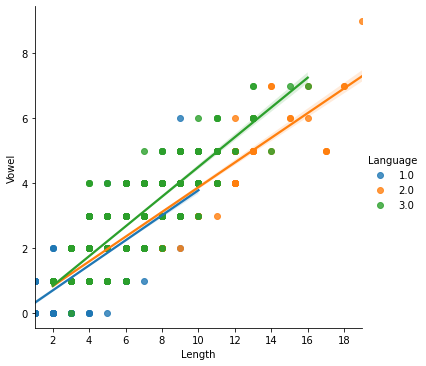

In [4]:
sns.lmplot(x="Length", y="Vowel", hue="Language", data=hung_comparison)

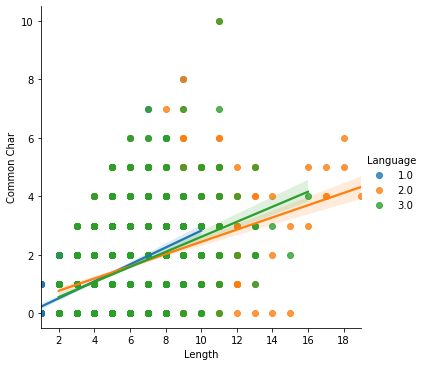

In [5]:
sns.lmplot(x="Length", y="Common Char", hue="Language", data=hung_comparison)

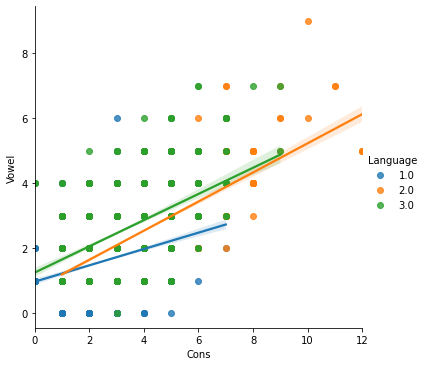

In [6]:
sns.lmplot(x="Cons", y="Vowel", hue="Language", data=hung_comparison)

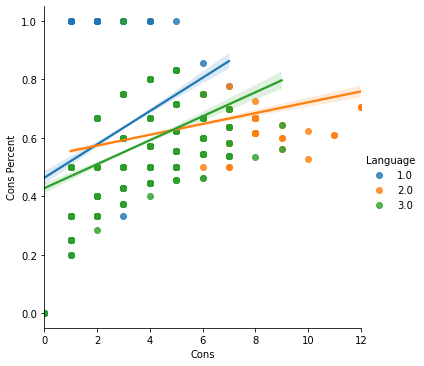

In [7]:
sns.lmplot(x="Cons", y="Cons Percent", hue="Language", data=hung_comparison)

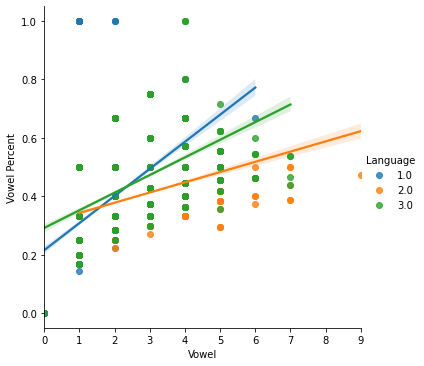

In [8]:
sns.lmplot(x="Vowel", y="Vowel Percent", hue="Language", data=hung_comparison)

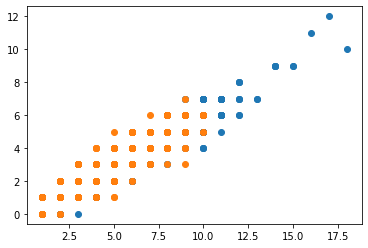

In [9]:
plt.scatter(h_a['H Word Length'], h_a['H Consonant Count'])
plt.scatter(h_a['A Word Length'], h_a['A Consonant Count'])


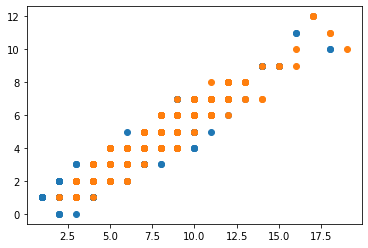

In [10]:
plt.scatter(h_b['H Word Length'], h_b['H Consonant Count'])
plt.scatter(h_b['B Word Length'], h_b['B Consonant Count'])


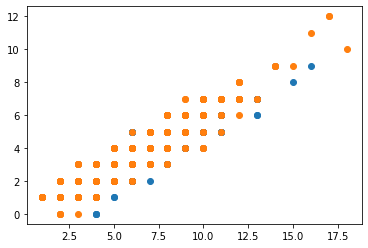

In [11]:
plt.scatter(h_r['R Word Length'], h_r['R Consonant Count'])
plt.scatter(h_r['H Word Length'], h_r['H Consonant Count'])


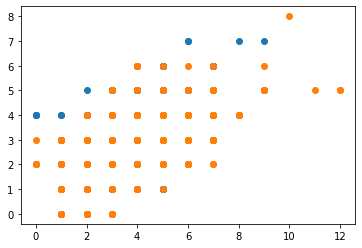

In [12]:
plt.scatter(h_r['R Consonant Count'], h_r['R Vowel Count'])
plt.scatter(h_r['H Consonant Count'], h_r['H Vowel Count'])


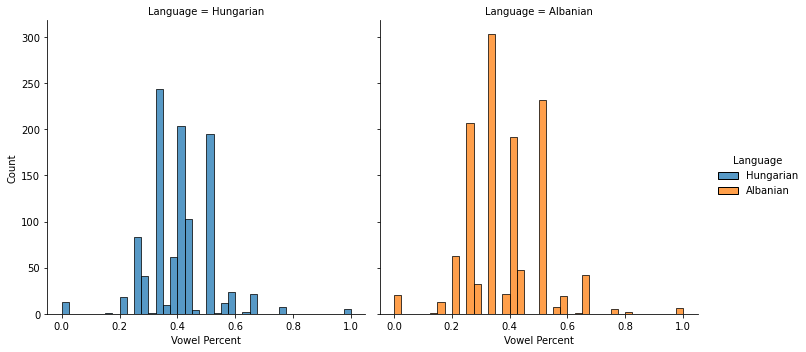

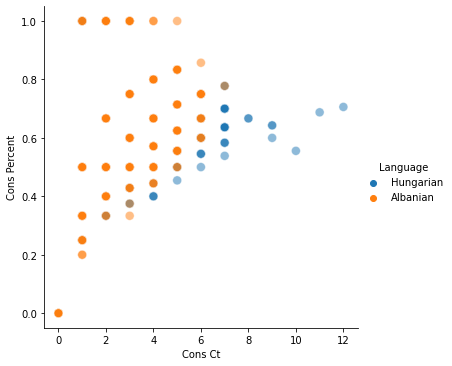

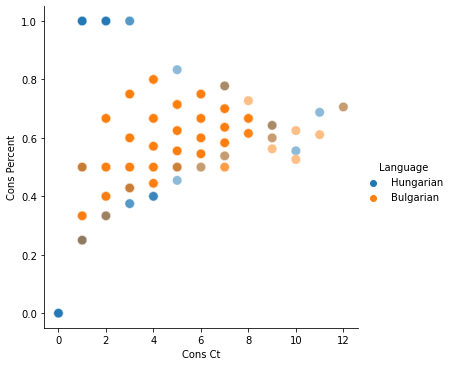

In [13]:


hva = result[(result.Language == "Albanian") | (result.Language == "Hungarian")]
hvr = result[(result.Language == "Romanian") | (result.Language == "Hungarian")]
hvb = result[(result.Language == "Bulgarian") | (result.Language == "Hungarian")]

sns.displot(data=hva, x="Vowel Percent", hue="Language", col="Language")

sns.relplot(x="Cons Ct", y="Cons Percent", hue="Language", s=80, alpha=0.5, data= hva)

sns.relplot(x="Cons Ct", y="Cons Percent", hue="Language", s=90, alpha=0.5, data= hvb)

1.070883452238061,
 1.2950181446007554,
 1.2236250342052282


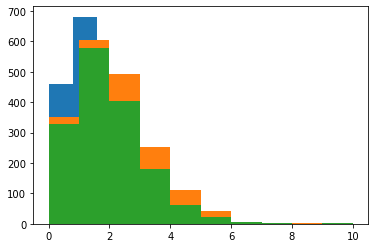

In [14]:
from collections import Counter   
h_a['Common Char'] = 0
com_char = []
for i in range(len(h_a["Hungarian"])):
    common_letters = Counter(h_a.Hungarian.iloc[i]) & Counter(h_a.Albanian.iloc[i])
    com_char.append(sum(common_letters.values()))
h_a['Common Char'] = com_char
plt.hist(h_a["Common Char"])

com_char2 = []
for i in range(len(h_b["Hungarian"])):
    common_letters = Counter(h_b.Hungarian.iloc[i]) & Counter(h_b.Bulgarian.iloc[i])
    com_char2.append(sum(common_letters.values()))
h_b['Common Char'] = com_char2
plt.hist(h_b["Common Char"])

com_char3 = []
for i in range(len(h_r["Hungarian"])):
    common_letters = Counter(h_r.Hungarian.iloc[i]) & Counter(h_r.Romanian.iloc[i])
    com_char3.append(sum(common_letters.values()))   
h_r['Common Char'] = com_char3
plt.hist(h_r["Common Char"])


print('{},\n {},\n {}'.format(h_a['Common Char'].std(),
h_b['Common Char'].std(),
h_r['Common Char'].std(),
h_a['Common Char'].mean(),
h_a['Common Char'].median(),
h_b['Common Char'].mean()))


## Linear Models

In [15]:
merged_clean = pd.read_csv("merged_clean.csv")

In [16]:
h_a = pd.DataFrame(
{"Parameter" : merged_clean["Parameter"].copy(),
 "Hungarian" : merged_clean["Hungarian"].copy(),
 "H Word Length" : 0,
 "H Vowel Count" : 0,
 "H Consonant Count" : 0,
 "Albanian" : merged_clean["Albanian"].copy(),
 "A Word Length" : 0,
 "A Vowel Count" : 0,
 "A Consonant Count" : 0,
}) 

h_a = h_a.drop_duplicates()

h_b = pd.DataFrame(
{"Parameter" : merged_clean["Parameter"].copy(),
 "Hungarian" : merged_clean["Hungarian"].copy(),
 "H Word Length" : 0,
 "H Vowel Count" : 0,
 "H Consonant Count" : 0,
 "Bulgarian" : merged_clean["Bulgarian"].copy(),
 "B Word Length" : 0,
 "B Vowel Count" : 0,
 "B Consonant Count" : 0,
}) 


h_b = h_b.drop_duplicates()

h_r = pd.DataFrame(
{"Parameter" : merged_clean["Parameter"].copy(),
 "Hungarian" : merged_clean["Hungarian"].copy(),
 "H Word Length" : 0,
 "H Vowel Count" : 0,
 "H Consonant Count" : 0,
 "Romanian" : merged_clean["Romanian"].copy(),
 "R Word Length" : 0,
 "R Vowel Count" : 0,
 "R Consonant Count" : 0,
}) 

h_r = h_r.drop_duplicates()

temp = 0
array_h = []
for i in h_a["Hungarian"]:
    temp = len(i)
    array_h.append(temp)
    
h_a['H Word Length'] = array_h
temp2 = 0
array_a = []
for i in h_a["Albanian"]:
    temp2 = len(i)
    array_a.append(temp2)
h_a['A Word Length'] = array_a

temp3 = 0
array_hb = []
for i in h_b["Hungarian"]:
    temp3 = len(i)
    array_hb.append(temp3)

h_b['H Word Length'] = array_hb

temp4 = 0
array_b = []
for i in h_b["Bulgarian"]:
    temp4 = len(i)
    array_b.append(temp4)
    
h_b['B Word Length'] = array_b

temp5 = 0
array_hr = []
for i in h_r["Hungarian"]:
    temp5 = len(i)
    array_hr.append(temp5)
    
h_r['H Word Length'] = array_hr

temp6 = 0
array_r = []
for i in h_r["Romanian"]:
    temp6 = len(i)
    array_r.append(temp6)
    
h_r['R Word Length'] = array_r

def count_vowel(str):
    """ takes string"""
    count = 0 
    vowel = set("aeiouyAEIOUY")
    for i in str:
        if i in vowel:
            count += 1
    return count
            
def col_it(df, col1, col2, function):
    """ takes dataframe, column to iterate over, column to append, and chosen functio """
    temp = 0
    array = []
    for i in df[col1]:
        temp = function(i)
        array.append(temp)
    df[col2] = array        

In [17]:
col_it(h_a, "Hungarian", "H Vowel Count", count_vowel)
col_it(h_a, "Albanian", "A Vowel Count", count_vowel)
col_it(h_b, "Hungarian", "H Vowel Count", count_vowel)
col_it(h_b, "Bulgarian", "B Vowel Count", count_vowel)
col_it(h_r, "Hungarian", "H Vowel Count", count_vowel)
col_it(h_r, "Romanian", "R Vowel Count", count_vowel)

def count_cons(str):
    """ takes string"""
    count = 0 
    vowel = set("bcdfghjklmnpqrstvwxzBCDFGHJKLMNPQRSTVWXZ")
    for i in str:
        if i in vowel:
            count += 1
    return count

col_it(h_a, "Hungarian", "H Consonant Count", count_cons)
col_it(h_a, "Albanian", "A Consonant Count", count_cons)
col_it(h_b, "Hungarian", "H Consonant Count", count_cons)
col_it(h_b, "Bulgarian", "B Consonant Count", count_cons)
col_it(h_r, "Hungarian", "H Consonant Count", count_cons)
col_it(h_r, "Romanian", "R Consonant Count", count_cons)

from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.cluster import KMeans

h_a.to_csv(r'/Users/adelinabranescu/Documents/Cornell/Fall_20/Data_2950/Final_Project/h_a.csv', index = True )
h_b.to_csv(r'/Users/adelinabranescu/Documents/Cornell/Fall_20/Data_2950/Final_Project/h_b.csv', index = True )
h_r.to_csv(r'/Users/adelinabranescu/Documents/Cornell/Fall_20/Data_2950/Final_Project/h_r.csv', index = True )


h_temp = pd.DataFrame({
"Word" : merged_clean['Hungarian'],
"Language" : "Hungarian"})

h_temp = h_temp.drop_duplicates()

a_temp = pd.DataFrame({
"Word" : merged_clean['Albanian'],
"Language" : "Albanian"})

b_temp = pd.DataFrame({
"Word" : merged_clean['Bulgarian'],
"Language" : "Bulgarian"})

r_temp = pd.DataFrame({
"Word" : merged_clean['Romanian'],
"Language" : "Romanian"})

a_temp = a_temp.drop_duplicates()
b_temp = b_temp.drop_duplicates()
r_temp = r_temp.drop_duplicates()

result = h_temp.append(a_temp, sort=False)
result = result.append(b_temp, sort=False)
result = result.append(r_temp, sort=False)

result['Word Len'] = 0
result['Vowel Ct'] = 0
result['Cons Ct'] = 0

col_it(result, "Word", "Vowel Ct", count_vowel)
col_it(result, "Word", "Cons Ct", count_cons)
col_it(result, "Word", "Word Len", len)

result['Vowel Percent'] = result['Vowel Ct']/result['Word Len']
result['Cons Percent'] = result['Cons Ct']/result['Word Len']
result['Cons/Vowel'] = result['Cons Ct']/result['Vowel Ct']

result.to_csv(r'/Users/adelinabranescu/Documents/Cornell/Fall_20/Data_2950/Final_Project/result.csv', index = True )

hvr = result[(result.Language == "Romanian") | (result.Language == "Hungarian")]
hvb = result[(result.Language == "Bulgarian") | (result.Language == "Hungarian")]

[Common Character Counter Source ](https://stackoverflow.com/questions/44269409/count-common-characters-in-strings-python#:~:text=If%20you%20want%20to%20maintain,Counter%20instead%20of%20set%20.&text=Analysis%2C%202%20is%20the%20correct,of%20either%20sets%20unique%20values.&text=therefore%20the%20minimum%20count%20is%204.)


In [18]:
from collections import Counter   
h_a['Common Char'] = 0
com_char = []
for i in range(len(h_a["Hungarian"])):
    common_letters = Counter(h_a.Hungarian.iloc[i]) & Counter(h_a.Albanian.iloc[i])
    com_char.append(sum(common_letters.values()))
h_a['Common Char'] = com_char


com_char2 = []

for i in range(len(h_b["Hungarian"])):
    common_letters = Counter(h_b.Hungarian.iloc[i]) & Counter(h_b.Bulgarian.iloc[i])
    com_char2.append(sum(common_letters.values()))

h_b['Common Char'] = com_char2

com_char3 = []


for i in range(len(h_r["Hungarian"])):
    common_letters = Counter(h_r.Hungarian.iloc[i]) & Counter(h_r.Romanian.iloc[i])
    com_char3.append(sum(common_letters.values()))
    
h_r['Common Char'] = com_char3

r_stack = h_r[['Romanian', 'R Word Length' , 'R Vowel Count' , 'R Consonant Count' , 'Common Char']].copy()

b_stack = h_b[['Bulgarian', 'B Word Length' , 'B Vowel Count' , 'B Consonant Count' , 'Common Char']].copy()

a_stack = h_a[['Albanian', 'A Word Length' , 'A Vowel Count' , 'A Consonant Count' , 'Common Char']].copy()

r_stack['Language'] = 'romanian'

a_stack['Language'] = 'albanian'

b_stack['Language'] = 'bulgarian'

a_stack = a_stack.rename(columns = {'Albanian':'Word', 'A Word Length':'Length', 'A Vowel Count': 'Vowel', 'A Consonant Count': 'Cons'})

b_stack = b_stack.rename(columns = {'Bulgarian':'Word', 'B Word Length':'Length', 'B Vowel Count': 'Vowel', 'B Consonant Count': 'Cons'})

r_stack = r_stack.rename(columns = {'Romanian':'Word', 'R Word Length':'Length', 'R Vowel Count': 'Vowel', 'R Consonant Count': 'Cons'})

words = []
length = []
vowel = []
cons = []
common = []
lang = []

for i in b_stack['Word']:
    words.append(i)

for i in r_stack['Word']:
    words.append(i)

for i in a_stack['Word']:
    words.append(i)
    
for i in a_stack['Length']:
    length.append(i)
    
for i in b_stack['Length']:
    length.append(i)
    
for i in r_stack['Length']:
    length.append(i)

for i in a_stack['Vowel']:
    vowel.append(i)
    
for i in b_stack['Vowel']:
    vowel.append(i)
    
for i in r_stack['Vowel']:
    vowel.append(i)

for i in a_stack['Cons']:
    cons.append(i)
    
for i in b_stack['Cons']:
    cons.append(i)
    
for i in r_stack['Cons']:
    cons.append(i)
    
for i in a_stack['Language']:
    lang.append(i)
    
for i in b_stack['Language']:
    lang.append(i)
    
for i in r_stack['Language']:
    lang.append(i)
    
for i in a_stack['Common Char']:
    common.append(i)
    
for i in b_stack['Common Char']:
    common.append(i)    
    
for i in r_stack['Common Char']:
    common.append(i)
    
    
hung_comparison = pd.DataFrame( {'Word': words, 'Length': length, 'Vowel': vowel, 'Cons': cons, 'Common Char': common, 'Language': lang })
hung_comparison['Cons Percent'] = hung_comparison['Cons']/hung_comparison['Length']
three_more = hung_comparison[hung_comparison['Common Char'] >= 3].copy()
three_less = hung_comparison[hung_comparison['Common Char'] < 3].copy()

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans



In [19]:
lang_map = {"albanian": 1, "bulgarian": 2, "romanian": 3}
hung_comparison['Language'] = hung_comparison['Language'].map(lang_map)

categories = ['Length', 'Vowel', 'Cons Percent','Language']

for i in categories: 
    cat_df = pd.DataFrame({i: hung_comparison[i], 'Common' : hung_comparison['Common Char']})
    cat_model = LinearRegression().fit(cat_df[[i]], cat_df[['Common']])
    predict_cat = cat_model.predict(cat_df[[i]])
    print(i)
    print('slope: {}'.format(cat_model.coef_))
    print('R-squared: {}'.format(cat_model.score(cat_df[[i]], cat_df[['Common']])))
    print('')

Length
slope: [[0.24153038]]
R-squared: 0.1630538690572243

Vowel
slope: [[0.42066308]]
R-squared: 0.12083786419211584

Cons Percent
slope: [[-0.21674405]]
R-squared: 0.00041089905937907734

Language
slope: [[0.1245633]]
R-squared: 0.00677923850976303



In [20]:
categories = pd.DataFrame({'Length' : hung_comparison['Length'], 'Vowel' : hung_comparison['Vowel'], 'Cons' : hung_comparison['Cons'], 'Country Distance' : hung_comparison['Language'] })
common = pd.DataFrame({'Common' : hung_comparison['Common Char']})
model = LinearRegression().fit(categories, common)
common_predict = model.predict(categories)


print('slope: {}'.format(model.coef_))
print('R-squared: {}'.format(model.score(categories, common)))


slope: [[-0.30470361  0.57519607  0.52932925 -0.02115352]]
R-squared: 0.16359257960835227


In [21]:
hung_comparison['Vowel Percent'] = hung_comparison['Vowel']/hung_comparison['Length']

def more_three(int): 
    if int >= 3:
        return 'Yes'
    else:
        return 'No'

array = []
for i in hung_comparison['Common Char']:
    array.append(more_three(i))

hung_comparison['More Three'] = array

hung_comparison['Language'] = [float(i) for i in hung_comparison['Language']]

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import numpy

y = numpy.ravel(hung_comparison[['More Three']])

model = LogisticRegression().fit(hung_comparison[['Language']], y)

predict = model.predict(hung_comparison[['Language']])

print('slope: {:.7f}'.format(float(model.coef_)))


slope: 0.2430207


In [22]:
X_train, X_test, y_train, y_test = train_test_split(hung_comparison[['Language']], hung_comparison[['More Three']], test_size=0.20, random_state=15)


In [23]:
new_df = pd.DataFrame({'Language': X_test['Language']})
predict_one = model.predict(new_df[['Language']])

predict_one = numpy.ravel(predict_one)
y_test = numpy.ravel(y_test)

accurate = 0

for i in range(len(predict_one)):
    if predict_one[i] == y_test[i]:
        accurate += 1

print('percent accurate: {:.1f}%'.format((accurate/len(y_test))*100))

percent accurate: 82.4%


In [24]:
train_df = pd.DataFrame({'Language': X_train['Language']})

predict_two = model.predict(train_df[['Language']])

predict_two = numpy.ravel(predict_two)
y_train = numpy.ravel(y_train)

accurate2 = 0

for i in range(len(predict_two)):
    if predict_two[i] == y_train[i]:
        accurate2 += 1

print('percent accurate: {:.1f}%'.format((accurate2/len(y_train))*100))

percent accurate: 83.2%


## Logistic Regression

In [25]:
hung_comparison = pd.read_csv("hung_comparison.csv")
alb = hung_comparison[hung_comparison['Language'] == 1].copy()
bulg = hung_comparison[hung_comparison['Language'] == 2].copy()
rom = hung_comparison[hung_comparison['Language'] == 3].copy()
alb = alb.drop_duplicates()
bulg = bulg.drop_duplicates()
rom = rom.drop_duplicates()
alb_bulg = alb.append(bulg)
alb_rom = alb.append(rom)
bulg_rom = bulg.append(rom)

In [26]:
hung_comparison

,Unnamed: 0,Word,Length,Vowel,Cons,Language,Common Char,Cons Percent,Vowel Percent,More Three
0,0,bot,3,1,2,1.0,0,0.666667,0.333333,No
1,1,e,1,1,0,1.0,0,0.000000,1.000000,No
2,2,rokulialem,10,5,5,1.0,3,0.500000,0.500000,Yes
3,3,dua,3,2,1,1.0,1,0.333333,0.666667,No
4,4,tok,3,1,2,1.0,1,0.666667,0.333333,No
...,...,...,...,...,...,...,...,...,...,...
5222,5222,binecuvinta,11,5,6,3.0,2,0.545455,0.454545,No
5223,5223,blagoslovi,10,4,6,3.0,3,0.600000,0.400000,Yes
5224,5224,blestema,8,3,5,3.0,4,0.625000,0.375000,Yes
5225,5225,postiajuna,10,5,5,3.0,2,0.500000,0.500000,No


In [27]:
def change_lang(float):
    if float == 3:
        return 'Romanian'
    elif float == 2:
        return 'Bulgarian'
    else:
        return 'Albanian'

ab = []
for i in alb_bulg['Language']:
    ab.append(change_lang(i))

alb_bulg['Language Name'] = ab


alb_bulg['Common Char'] = [float(i) for i in alb_bulg['Common Char']]

ar = []
for i in alb_rom['Language']:
    ar.append(change_lang(i))

alb_rom['Language Name'] = ar

br = []
for i in bulg_rom['Language']:
    br.append(change_lang(i))

bulg_rom['Language Name'] = br

alb_rom['Common Char'] = [float(i) for i in alb_rom['Common Char']]
bulg_rom['Common Char'] = [float(i) for i in bulg_rom['Common Char']]

In [28]:
alb_rom['Common Char %'] = alb_rom['Common Char']/alb_rom['Length']
alb_bulg['Common Char %'] = alb_bulg['Common Char']/alb_bulg['Length']
bulg_rom['Common Char %'] = bulg_rom['Common Char']/bulg_rom['Length']

## Bulgarian v Romanian

In [29]:
for i in ['Length', 'Cons', 'Vowel', 'Vowel Percent', 'Common Char', 'Common Char %']:
    y = np.ravel(bulg_rom[['Language Name']])
    model = LogisticRegression().fit(bulg_rom[[i]], y)
    predict = model.predict(bulg_rom[[i]])
    print(i)
    print('slope: {:.7f}'.format(float(model.coef_)))
    X_train, X_test, y_train, y_test = train_test_split(bulg_rom[[i]], bulg_rom[['Language Name']], test_size=0.20, random_state=15)
    train_df = pd.DataFrame({i: X_train[i]})
    predict_two = model.predict(train_df[[i]])
    predict_two = np.ravel(predict_two)
    y_train = np.ravel(y_train)
    accurate2 = 0
    for j in range(len(predict_two)):
        if predict_two[j] == y_train[j]:
            accurate2 += 1
    print('percent accurate: {:.1f}%'.format((accurate2/len(y_train))*100)) 
    ab_test = pd.DataFrame({i: X_test[i]})
    predict_ab1 = model.predict(ab_test[[i]])
    predict_ab1 = np.ravel(predict_ab1)
    y_test = np.ravel(y_test)
    accurate = 0
    for j in range(len(predict_ab1)):
        if predict_ab1[j] == y_test[j]:
            accurate += 1
    print('percent accurate: {:.1f}%'.format((accurate/len(y_test))*100))
    print()

Length
slope: -0.1399016
percent accurate: 56.4%
percent accurate: 55.6%

Cons
slope: -0.3964938
percent accurate: 58.1%
percent accurate: 59.3%

Vowel
slope: 0.0762240
percent accurate: 53.6%
percent accurate: 55.9%

Vowel Percent
slope: 4.9531978
percent accurate: 63.5%
percent accurate: 66.0%

Common Char
slope: -0.0999854
percent accurate: 53.5%
percent accurate: 56.0%

Common Char %
slope: -0.1699031
percent accurate: 53.5%
percent accurate: 56.0%



## Albanian v Romanian

In [30]:
for i in ['Length', 'Cons', 'Vowel', 'Vowel Percent', 'Common Char', 'Common Char %']:
    y = np.ravel(alb_rom[['Language Name']])
    model = LogisticRegression().fit(alb_rom[[i]], y)
    predict = model.predict(alb_rom[[i]])
    print(i)
    print('slope: {:.7f}'.format(float(model.coef_)))
    X_train, X_test, y_train, y_test = train_test_split(alb_rom[[i]], alb_rom[['Language Name']], test_size=0.20, random_state=15)
    train_df = pd.DataFrame({i: X_train[i]})
    predict_two = model.predict(train_df[[i]])
    predict_two = np.ravel(predict_two)
    y_train = np.ravel(y_train)
    accurate2 = 0
    for j in range(len(predict_two)):
        if predict_two[j] == y_train[j]:
            accurate2 += 1
    print('percent accurate: {:.1f}%'.format((accurate2/len(y_train))*100)) 
    ab_test = pd.DataFrame({i: X_test[i]})
    predict_ab1 = model.predict(ab_test[[i]])
    predict_ab1 = np.ravel(predict_ab1)
    y_test = np.ravel(y_test)
    accurate = 0
    for j in range(len(predict_ab1)):
        if predict_ab1[j] == y_test[j]:
            accurate += 1
    print('percent accurate: {:.1f}%'.format((accurate/len(y_test))*100))
    print()

Length
slope: 0.3754929
percent accurate: 62.1%
percent accurate: 62.9%

Cons
slope: 0.2035049
percent accurate: 54.7%
percent accurate: 54.2%

Vowel
slope: 0.9983281
percent accurate: 67.5%
percent accurate: 67.8%

Vowel Percent
slope: 4.4113155
percent accurate: 62.0%
percent accurate: 62.7%

Common Char
slope: 0.1816676
percent accurate: 54.1%
percent accurate: 54.4%

Common Char %
slope: -0.2377524
percent accurate: 52.2%
percent accurate: 55.1%



## Bulgarian v Albanian

In [31]:
for i in ['Length', 'Cons', 'Vowel', 'Vowel Percent', 'Common Char', 'Common Char %']:
    y = np.ravel(alb_bulg[['Language Name']])
    model = LogisticRegression().fit(alb_bulg[[i]], y)
    predict = model.predict(alb_bulg[[i]])
    print(i)
    print('slope: {:.7f}'.format(float(model.coef_)))
    X_train, X_test, y_train, y_test = train_test_split(alb_bulg[[i]], alb_bulg[['Language Name']], test_size=0.20, random_state=15)
    train_df = pd.DataFrame({i: X_train[i]})
    predict_two = model.predict(train_df[[i]])
    predict_two = np.ravel(predict_two)
    y_train = np.ravel(y_train)
    accurate2 = 0
    for j in range(len(predict_two)):
        if predict_two[j] == y_train[j]:
            accurate2 += 1
    print('percent accurate: {:.1f}%'.format((accurate2/len(y_train))*100)) 
    ab_test = pd.DataFrame({i: X_test[i]})
    predict_ab1 = model.predict(ab_test[[i]])
    predict_ab1 = np.ravel(predict_ab1)
    y_test = np.ravel(y_test)
    accurate = 0
    for j in range(len(predict_ab1)):
        if predict_ab1[j] == y_test[j]:
            accurate += 1
    print('percent accurate: {:.1f}%'.format((accurate/len(y_test))*100))
    print()

Length
slope: 0.5002415
percent accurate: 65.4%
percent accurate: 65.1%

Cons
slope: 0.5883032
percent accurate: 62.0%
percent accurate: 62.8%

Vowel
slope: 1.0198374
percent accurate: 67.8%
percent accurate: 67.2%

Vowel Percent
slope: 1.6006929
percent accurate: 60.1%
percent accurate: 60.2%

Common Char
slope: 0.2841944
percent accurate: 56.4%
percent accurate: 55.9%

Common Char %
slope: -0.0813102
percent accurate: 52.0%
percent accurate: 49.9%



# Evaluation of Significance

### Slopes from Logistic Regression

The slopes I obtained when I ran linear regressions on factors like Length, Number of Consonants, and Vowels were much larger than these slopes. They had an absolute value greater than 0.01. However, these were fairly obvious correlations. When the length of a word increases, there is a higher chance of finding characters in common with another word, especially since our model is so simplistic. It is hard to quantitatively account for similiarties between two short three or letter words, even though they may have common origins. The slopes are printed below.

In [32]:
def random_regression(n):
    x = np.random.normal(loc=0.0, scale=1.0, size=(n))
    y = np.random.normal(loc=0.0, scale=1.0, size=(n))
    x = x.reshape(-1, 1)
    reg = LinearRegression().fit(x, y)
    slope = reg.score(x,y)
    return slope

print('Slope for random trial 1: {}'.format(random_regression(2761)))


Slope for random trial 1: 0.00017010857787547184


In [33]:
def random_regression(n):
    x = np.random.normal(loc=0.0, scale=1.0, size=(n))
    y = np.random.normal(loc=0.0, scale=1.0, size=(n))
    x = x.reshape(-1, 1)
    reg = LinearRegression().fit(x, y)
    slope = reg.score(x,y)
    return slope

print('Slope for random trial 2: {}'.format(random_regression(2761)))


Slope for random trial 2: 0.0005281778175055818


In [34]:
def random_regression(n):
    x = np.random.normal(loc=0.0, scale=1.0, size=(n))
    y = np.random.normal(loc=0.0, scale=1.0, size=(n))
    x = x.reshape(-1, 1)
    reg = LinearRegression().fit(x, y)
    slope = reg.score(x,y)
    return slope

print('Slope for random trial 3: {}'.format(random_regression(2761)))


Slope for random trial 3: 0.0008520542383386731


For the logistic regressions, the slopes were fairly large. However, not every model had a large accuracy rate. I checked the accuracy rate, and they ranged from 50% accurate to 67.8% accurate. The accuracies are printed next to each model. However, given that there are two possible options, a random model would have a 50% accuracy rate roughly, because there is a 50% chance of guessing correctly. 

# Interpretation and Conclusions


### Vowel Count, Vowel Percentage, and Word Length

I concluded that there was no significant differnce between Albanian, Romanian, and Hungarian in how many characters they had in common. This difference was not a successful variable in creating a model that could distinguish between languages. Vowel count, word length, and vowel percentage had the highest success rates. It is evident that Romanian, Hungarian, and Bulgarian have differences in those respescts. 

### Similarity to Hungarian

Similarity between a word and Hungarian was not a factor that could help distinguish Romanian, Hungarian, and Bulgarian from each other. From the start of the project, it was known that the three languages had no structural similarities to Hungarian or any similarities in the origin of the langauge. They were all in different language groups. However, Romanian had more words in common with Hungarian than the other languages. My model did not pick up on this. This is for multiple reasons; the similarities that exist may be between similar sounding characters but not the same characters--my model only accounted for identical characters. I grouped together some vowel sounds and consonant sounds into one character when I cleaned the data, such as a form of "a" and "i" in Romanian that sounds almost the same, or "k" and "c". Overall, a similarity in characters to Hungarian only increased the accuracy of my model by 1% or 2%. 


# Limitations

### Difficulty in Measuring Similarity 

The way I measured similarity in my project is through counting how many characters two words of the same meaning had in common. This works well for some words, like the word for "dust" I showed in the introduction. It is clear that each word begins with "p", some of the same vowels, and consonants. I found that measuring the number of characters in common does not display similarity well. However, Romanian is linguistically estbalished to have the most words in common with Hungarian because of the occupied territory, and it also had the longest mean and median common characters. The statistics showed this similarity, however, my predicted models did not.



# Source Code

  - [My GitHub Page](https://github.com/avb37/2950Final)
  - [Data Cleaning](https://github.com/avb37/2950Final/blob/master/Data%20Cleaning%20Rough%20Draft.ipynb)
  - [Data Cleaning and Rough Drafts](https://github.com/avb37/2950Final/blob/master/Draft%204.ipynb)


# Acknowledgements

### Common Characters Counter 

[Stack Overflow](https://stackoverflow.com/questions/44269409/count-common-characters-in-strings-python#:~:text=If%20you%20want%20to%20maintain,Counter%20instead%20of%20set%20.&text=Analysis%2C%202%20is%20the%20correct,of%20either%20sets%20unique%20values.&text=therefore%20the%20minimum%20count%20is%204.)

[Python Link](https://docs.python.org/3/library/collections.html#collections.Counter)